# 120 years of Olympic history: athletes and results - dataset from kaggle

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import scipy.stats as stt
import warnings
warnings.filterwarnings('ignore')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
data = pd.read_csv('Desktop/sport/athlete.csv')

In [8]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [9]:
data.shape[0]

271116

In [ ]:
Now train to compare mean's by statistic, for example by male and female age/weight/height.

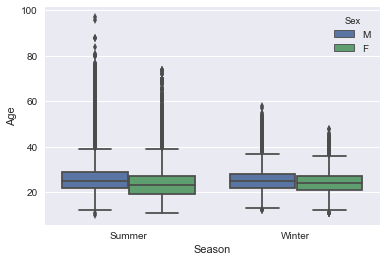

In [12]:
sns.boxplot(x='Season',y='Age',hue='Sex',data=data);

Here we can see, that by weight and height there are significant differences. But we must verify it by statistics.

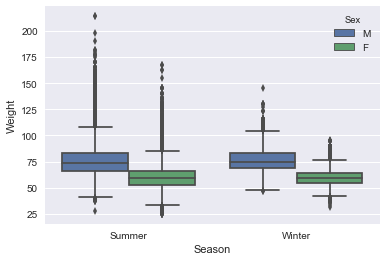

In [31]:
sns.boxplot(x='Season',y='Weight',hue='Sex',data=data);
mal_weig = data.Weight[data.Sex=='M'].dropna()
fem_weig = data.Weight[data.Sex=='F'].dropna()
#mal_weig.head()

From this qq-plot you can see, that heavy athlets derive the graph from the normal distribution and they are an important part of this dataset. So, we need some transformation.

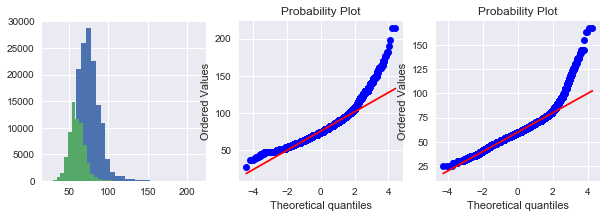

In [14]:
mal_weig = data.Weight[data.Sex=='M'].dropna()
fem_weig = data.Weight[data.Sex=='F'].dropna()
fig = plt.figure(figsize=(10,10))
fig.add_subplot(3,3,1)
mal_weig.hist(bins=30)
fem_weig.hist(bins=30)
fig.add_subplot(3,3,2)
stt.probplot(mal_weig, plot=pylab);
fig.add_subplot(3,3,3)
stt.probplot(fem_weig, plot=pylab);

After some easy transformation, we can see, that data become more smoother. 

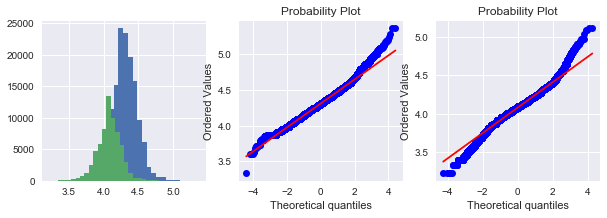

In [15]:
mal_weig = np.log(data.Weight[data.Sex=='M'].dropna())
fem_weig = np.log(data.Weight[data.Sex=='F'].dropna())
fig = plt.figure(figsize=(10,10))
fig.add_subplot(3,3,1)
mal_weig.hist(bins=30)
fem_weig.hist(bins=30)
fig.add_subplot(3,3,2)
stt.probplot(mal_weig, plot=pylab);
fig.add_subplot(3,3,3)
stt.probplot(fem_weig, plot=pylab);

Now we can conduct Student's test with unknown dispersion. The H0 will be the same averages, the alternative H1 - means deffers. And we consider 1% of data, because ttest work bad with large amount of data. This test show, that the difference between averages is statistically significant.

In [16]:
male_sample = mal_weig.iloc[[random.randint(0,mal_weig.shape[0]) for i in range(int(mal_weig.shape[0]*0.01))]]
female_sample = fem_weig.iloc[[random.randint(0,fem_weig.shape[0]) for i in range(int(fem_weig.shape[0]*0.01))]]

stt.ttest_ind_from_stats(male_sample.mean(),male_sample.std(),male_sample.shape[0],\
                         female_sample.mean(),female_sample.std(),female_sample.shape[0],equal_var=True)

Ttest_indResult(statistic=29.775266150786532, pvalue=1.4404438943050333e-162)

Here you can see, that age and height means statistically significant (be this test), but p-value degree of age is much more, than weight or height, so it can be the same. 
Finally, it seems that male athlets are heavier and taller, and age is the same.

In [17]:
mal_age = data.Age[data.Sex=='M'].dropna()
fem_age = data.Age[data.Sex=='F'].dropna()

male_sample = mal_age.iloc[[random.randint(0,mal_age.shape[0]) for i in range(int(mal_age.shape[0]*0.01))]]
female_sample = fem_age.iloc[[random.randint(0,fem_age.shape[0]) for i in range(int(fem_age.shape[0]*0.01))]]

stt.ttest_ind_from_stats(male_sample.mean(),male_sample.std(),male_sample.shape[0],\
                         female_sample.mean(),female_sample.std(),female_sample.shape[0],equal_var=True)

Ttest_indResult(statistic=10.727712663416774, pvalue=2.6399718799264306e-26)

In [18]:
mal_height = data.Height[data.Sex=='M'].dropna()
fem_height = data.Height[data.Sex=='F'].dropna()

male_sample = mal_height.iloc[[random.randint(0,mal_height.shape[0]) for i in range(int(mal_height.shape[0]*0.01))]]
female_sample = fem_height.iloc[[random.randint(0,fem_height.shape[0]) for i in range(int(fem_height.shape[0]*0.01))]]

stt.ttest_ind_from_stats(male_sample.mean(),male_sample.std(),male_sample.shape[0],\
                         female_sample.mean(),female_sample.std(),female_sample.shape[0],equal_var=True)

Ttest_indResult(statistic=25.395841317339794, pvalue=2.404667352033495e-124)

## Now consider what change in games over the years. 

Firstly, sample the years.

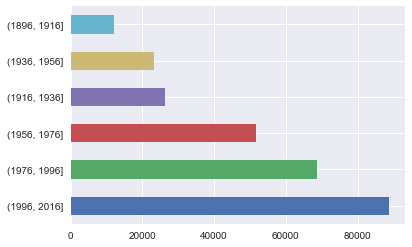

In [19]:
categ = pd.cut(data.Year,[1896,1916,1936,1956,1976,1996,2016])
pd.value_counts(categ).plot(kind='barh');

I'm very interested, how changes weight or age. These graphics don't show expressed trend:

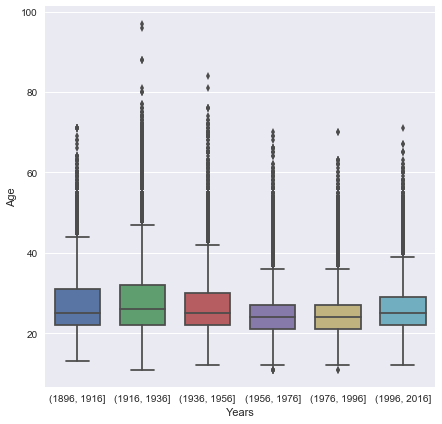

In [91]:
dat_new = data[['ID','Sex','Age','Height','Weight','NOC','Season','Sport','Medal']]
dat_new['Years'] = categ
plt.figure(figsize=(7,7))
sns.boxplot(x='Years',y='Age',data=dat_new, width=0.7);
#sns.violinplot(x='Years',y='Age',data=dat_new, width=0.7);

Try to check with F-score, having this samples equal means or not. Sertainly, samples aren't absolutely independent, but assume that they relation isn't high. Another assumptions are performed - each sample is from a normally distributed population and standard deviations of the groups are all equal (you can see it from the violinplot). 
F-test show, that they are different.

In [85]:
dat = dat_new.dropna()
sample = []
for j in range(6):
        sample.append(dat[dat.Years==dat.Years.unique()[j]].Age.values)
stt.f_oneway(*sample)

F_onewayResult(statistic=130.81222769354443, pvalue=1.3400193045770828e-137)

F-test in Weight shows interesting results. It seems, that the weight has not changed much over the years. Something more extremal result we can see with f-test for Height.

F_onewayResult(statistic=2.832810516849116, pvalue=0.014615853947556753)


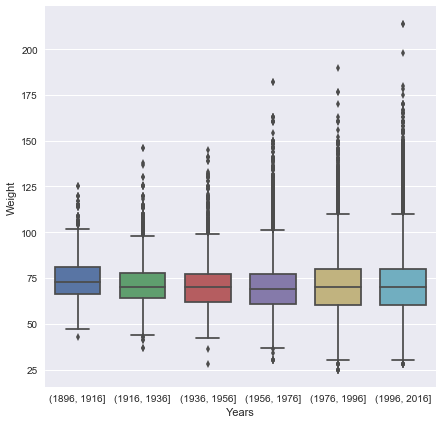

In [100]:
dat_new = data[['ID','Sex','Age','Height','Weight','NOC','Season','Sport','Medal']]
dat_new['Years'] = categ
plt.figure(figsize=(7,7))
sns.boxplot(x='Years',y='Weight',data=dat_new, width=0.7);
#sns.swarmplot(x='Years',y='Age',data=dat_new);
sample = []
for j in range(6):
        sample.append(dat[dat.Years==dat.Years.unique()[j]].Weight.values)
print(stt.f_oneway(*sample))


Here we can see, that 2 most popular positions don't change through all time - Gymnastic and Athletics. Swimming has become popular since 1956.

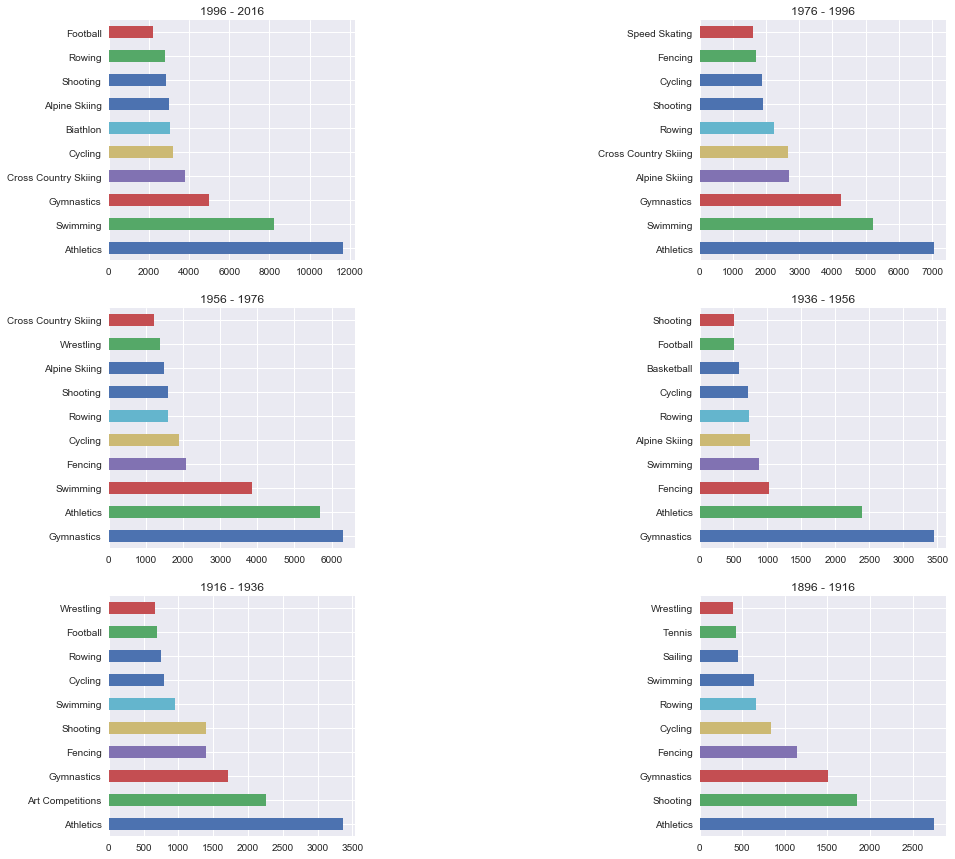

In [22]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('1996 - 2016')
pd.value_counts(data[data.Year>1996].Sport)[:10].plot(kind='barh');
ax2 = fig.add_subplot(3,3,3)
ax2.set_title('1976 - 1996')
pd.value_counts(data[(data.Year<1996) & (data.Year>1976)].Sport)[:10].plot(kind='barh');
ax3 = fig.add_subplot(3,3,4)
ax3.set_title('1956 - 1976')
pd.value_counts(data[(data.Year<1976) & (data.Year>1956)].Sport)[:10].plot(kind='barh');
ax4 = fig.add_subplot(3,3,6)
ax4.set_title('1936 - 1956')
pd.value_counts(data[(data.Year<1956) & (data.Year>1936)].Sport)[:10].plot(kind='barh');
ax5 = fig.add_subplot(3,3,7)
ax5.set_title('1916 - 1936')
pd.value_counts(data[(data.Year<1936) & (data.Year>1916)].Sport)[:10].plot(kind='barh');
ax6 = fig.add_subplot(3,3,9)
ax6.set_title('1896 - 1916')
pd.value_counts(data[(data.Year<1916)].Sport)[:10].plot(kind='barh');

How many new sports appears in olympic games:

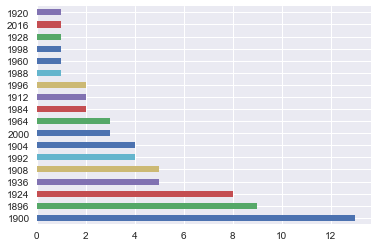

In [23]:
grop_sport = data['Year'].groupby(data['Sport']).min()
pd.value_counts(grop_sport).plot.barh();

Top - 10 winning countries 

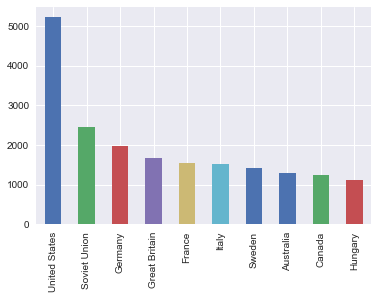

In [24]:
#fig = plt.figure(figsize=(15,15))
pd.value_counts(data[data.Medal.notnull()]['Team']).head(10).plot.bar();

Now more detailed Medal distribution.

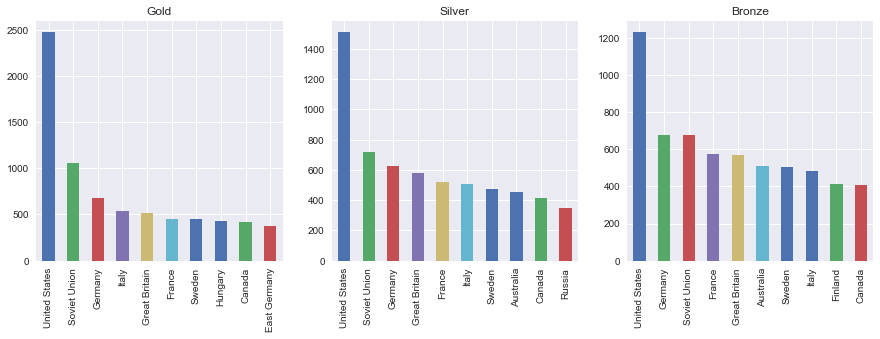

In [25]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('Gold')
pd.value_counts(data[data.Medal=='Gold']['Team']).head(10).plot.bar();
ax2 = fig.add_subplot(3,3,2)
ax2.set_title('Silver')
pd.value_counts(data[data.Medal=='Silver']['Team']).head(10).plot.bar();
ax3 = fig.add_subplot(3,3,3)
ax3.set_title('Bronze')
pd.value_counts(data[data.Medal=='Bronze']['Team']).head(10).plot.bar();

Top 10 winners from 3 most popular sports - Swimming, Gymnastics and Athletics.

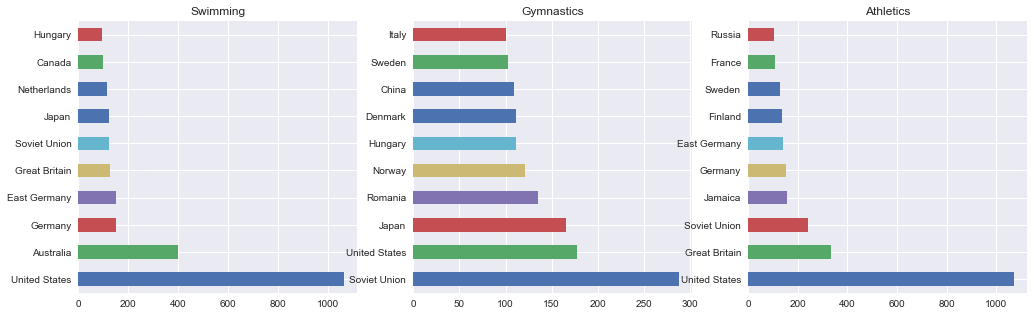

In [26]:
fig = plt.figure(figsize=(17,17))
ax1 = fig.add_subplot(3,3,1)
ax1.set_title('Swimming')
pd.value_counts(data[(data.Medal.notnull()) & (data['Sport']=='Swimming')]['Team'])[:10].plot.barh();
ax2 = fig.add_subplot(3,3,2)
ax2.set_title('Gymnastics')
pd.value_counts(data[(data.Medal.notnull()) & (data['Sport']=='Gymnastics')]['Team'])[:10].plot.barh();
ax3 = fig.add_subplot(3,3,3)
ax3.set_title('Athletics')
pd.value_counts(data[(data.Medal.notnull()) & (data['Sport']=='Athletics')]['Team'])[:10].plot.barh();

When the top-10 popular sports appeared:

In [28]:
ss = pd.value_counts(dat_new.Sport)[:10]
qq = list(ss.index)
for i in qq:
    print(i,data[data.Sport==i].Year.min())

Athletics 1896
Gymnastics 1896
Swimming 1896
Shooting 1896
Cycling 1896
Fencing 1896
Rowing 1900
Cross Country Skiing 1924
Alpine Skiing 1936
Wrestling 1896


In [29]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
